# Vision industrielle - TP noté

### Exécuter la cellule suivante afin de charger l'ensemble des outils et fonctions nécessaires

In [3]:
from IPython.core.display import HTML
from functools import partial
import numpy as np
import scipy.ndimage
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib notebook
#%matplotlib inline
import pip
pip.main('install imageio'.split())
import imageio
import skimage.morphology
import skimage.segmentation
import skimage.feature
import skimage.data


plt.rcParams['image.cmap'] = 'gray'
plt.rcParams['image.interpolation'] = 'none'
plt.rcParams['figure.max_open_warning'] = 100
plt.rcParams['figure.figsize'] = 2, 2

def format_coord(x, y, image):
    x = int(x + 0.5)
    y = int(y + 0.5)
    try:
        val = str(image[y, x])
    except IndexError:
        val = "?"
    return "color={} @ [{}, {}]".format(val, y, x)

def display_image_nb(image, title='', cmap=None):
    fig, ax = plt.subplots(1,1)
    if cmap is None:
        ax.matshow(image)
    else:
        ax.matshow(image, cmap=cmap)
    ax.set_xlabel(title)
    ax.format_coord = partial(format_coord, image=image)
    #return fig, ax

def display_image_color(image, title=''):
    fig, ax = plt.subplots(1,1)
    ax.imshow(image)
    ax.set_xlabel(title)
    ax.format_coord = partial(format_coord, image=image)
    #return fig, ax

def draw_rectangle(y1, x1, y2, x2, color='red', ax=None, alpha=1):
    """ Add a rectangle on an image """
    if ax is None:
        ax = plt.gca()
    rect = mpatches.Rectangle((x1, y1), x2 - x1, y2 - y1,
                              fill=False, edgecolor=color, linewidth=2, alpha=alpha)
    ax.add_patch(rect)

print("OK let's go")


You are using pip version 7.1.2, however version 8.1.0 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


OK let's go


# Exercice 1: Trouver les différences

Compléter le code suivant afin de trouver les différences entre les deux images img_nb_1, img_nb_2


<IPython.core.display.Javascript object>


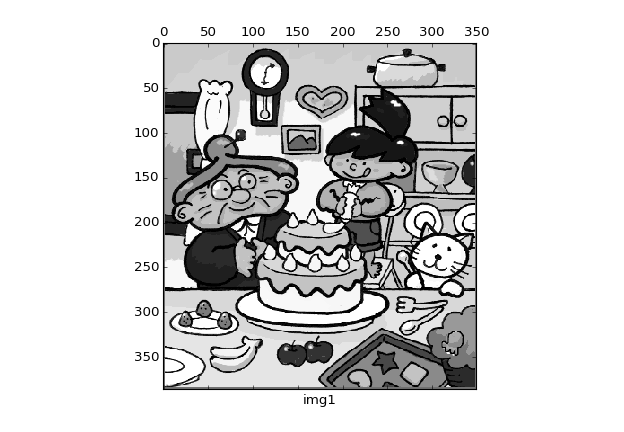

<IPython.core.display.Javascript object>


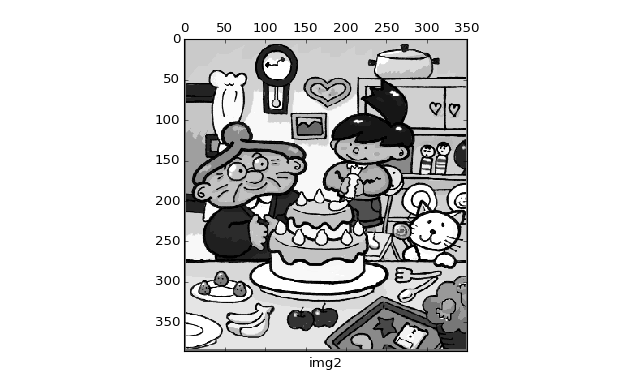

In [89]:
# chargement des images
img_nb_1 = imageio.imread('http://srand.fr/data/spot_diff_1.png')
img_nb_2 = imageio.imread('http://srand.fr/data/spot_diff_2.png')
display_image_nb(img_nb_1, title='img1')
display_image_nb(img_nb_2, title='img2')


- Calculer la différence entre **img_nb_1** et **img_nb_2**:

In [ ]:
img_diff =

- Afficher l'image des différences

- Calculer le masque binaire correspondant aux positions où une différence a été détectée (le masque doit valoir **True** là où une différence a été détectée)
- Afficher ce masque

In [ ]:
mask = 

# afficher le masque : 

- Utiliser une opération morphologique afin de regrouper les régions du masque ayant des valeurs à True (i.e il s'agit ici d'enlever les trous dans les zones blanches)

In [ ]:
import skimage.morphology

new_mask = 

Dessiner un rectange autour

Aide: le code est quasiment similaire à celui du tp1 (cellule 31: http://srand.fr/cours/tp1_red_ball_detection-Correction_one_page.html )

- Combien de différences présentent les deux images

Solution

/home/seto/anaconda3/lib/python3.4/site-packages/matplotlib/pyplot.py:424: RuntimeWarning: More than 100 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


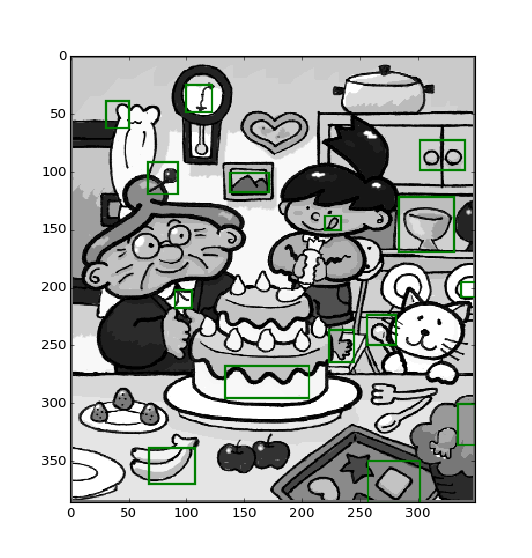

<IPython.core.display.Javascript object>


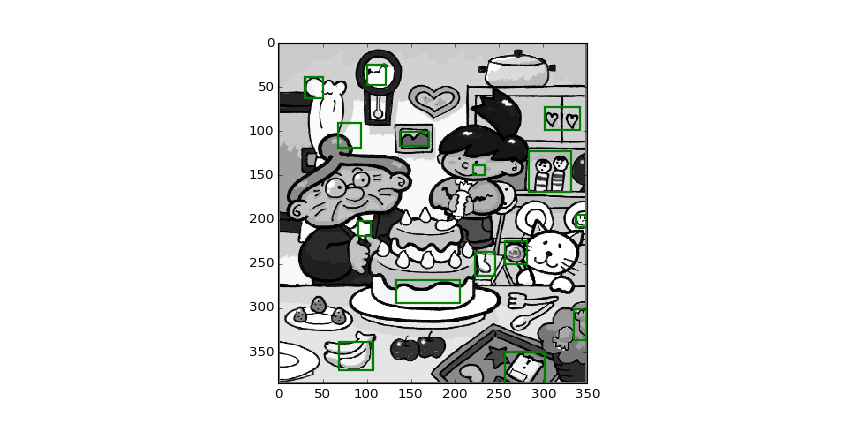

In [119]:
res = left - right
#display_image_nb(res)
mask = res != 0

d = skimage.morphology.closing(mask, selem=skimage.morphology.diamond(5))

label_image = skimage.measure.label(d)
display_image_color(img_nb_1)
for region in skimage.measure.regionprops(label_image):
    # skip small region
    if region.area < 100:
        continue

    # draw rectangle around segmented coins
    minr, minc, maxr, maxc = region.bbox
    draw_rectangle(minr, minc, maxr, maxc, color='green')

display_image_color(img_nb_2)
for region in skimage.measure.regionprops(label_image):
    # skip small region
    if region.area < 100:
        continue

    # draw rectangle around segmented coins
    minr, minc, maxr, maxc = region.bbox
    draw_rectangle(minr, minc, maxr, maxc, color='green')

    
    

In [7]:
url = "http://srand.fr/data/plaque_imat_1.jpg"
image = imageio.imread(url)

<IPython.core.display.Javascript object>


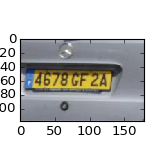

In [8]:
display_image_color(image)

<IPython.core.display.Javascript object>


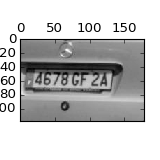

In [21]:
image_nb = skimage.color.rgb2gray(image)
#image_res = image_nb.copy()
#image_res[~(image_nb < 0.4)] = 1
#display_image_nb(image_res)

#display_image_nb(skimage.feature.canny(image_nb))
res = skimage.color.rgb2lab(image)
k = res[:,:,0].copy()
display_image_nb(res[:,:,0])

1. Training images
------------------

These are located in CarData/TrainImages/.
The positive (car) images are named pos-n.pgm (0 <= n <= 549). 
The negative (non-car) images are named similarly as neg-n.pgm 
(0 <= n <= 499). 

The training images are all 100x40 pixels in size.


2. Test images - Single-scale
-----------------------------

These are located in CarData/TestImages/ and are named test-n.pgm
(0 <= n <= 169). The images are of different sizes themselves but
contain cars of approximately the same scale as in the training
images. These test images contain 200 cars in all.


In [ ]:
# décompressez l'archive, vous pouvez aussi utiliser un outil tels que winrar pour décompresser l'archive
#import tarfile
#tar_obj = tarfile.open(chemin_vers_archive)
#tar_obj.extractall('./')

In [47]:
import glob
path = '/home/seto/Téléchargements/test/CarData/TrainImages/'
negative_files = glob.glob(path + 'neg-*.pgm')
positive_files = glob.glob(path + 'pos-*.pgm')

X = []
Y = []

for file in negative_files:
    image = imageio.imread(file)
    X.append(image.flatten())
    Y.append('negative')
    
for file in positive_files:
    image = imageio.imread(file)
    X.append(image.flatten())
    Y.append('positive')
    
imageio.imread(file).shape

(40, 100)

In [43]:
import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import cross_val_score

In [44]:
clf = KNeighborsClassifier()
#clf.fit(X,Y)
cross_val_score(clf, X, Y)

array([ 0.94301994,  0.94857143,  0.95415473])

In [46]:
clf.fit(X,Y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_neighbors=5, p=2, weights='uniform')

In [48]:

def check_image(image_test, window_size = (40, 100), clf=clf):
    STEP = max(window_size) /3
    tab = skimage.util.view_as_windows(image_test, window_size, STEP)
    display_image_nb(image_test)
    for i in range(tab.shape[0]):
        for j in range(tab.shape[1]):
            block = tab[i, j]
            features = image_test
            prediction = clf.predict(features.flatten())
            #print(prediction)
            if prediction == 'positive':
                draw_rectangle(i*STEP, j*STEP, i*STEP+window_size[0], j*STEP+window_size[1], color='green')


<IPython.core.display.Javascript object>


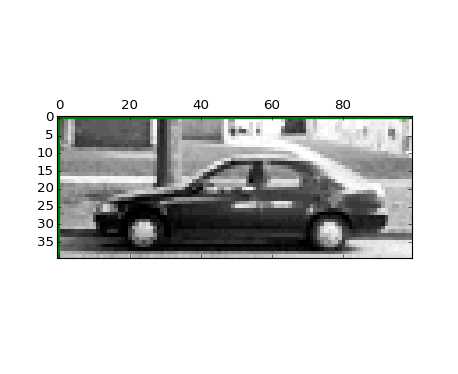

In [49]:
check_image(imageio.imread(file))

In [56]:
test_images = glob.glob('/home/seto/Téléchargements/test/CarData/TestImages/*.pgm')
for file in test_images:
    image = imageio.imread(file)
    print(image.shape)
    #display_image_nb(image)
    #check_image(image)
    break


(90, 150)


In [ ]:
TODO a finir.. facile